In [1]:
import os
os.getcwd()

'C:\\Users\\llevshtanov\\Kansk'

In [2]:
os.chdir('bukvi')

In [3]:
folder_names = os.listdir()


In [4]:
os.chdir('0')

In [5]:
import numpy as np

In [6]:
from PIL import Image

In [7]:
import cv2

In [8]:
from keras.utils import np_utils

Using TensorFlow backend.


In [9]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
folder_names = folder_names[:-1]

In [11]:

##folder_names = 
(folder_names)#[0:3]

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [12]:
x4 = []
y = []

for f_n in folder_names:
    os.chdir('../'+f_n)
    pics = os.listdir() 
  #  print(f_n)
    for i in pics:
        try:
            


            img = Image.open(i).convert('LA')
            x = np.array(img)
            x0 = x[:, :, 0]
            x1 = cv2.resize(x0, (40,55))
            x4.append(x1)
            y.append(int(f_n))
        except:
            pass
    

In [13]:
x4[6].shape

(55, 40)

In [14]:
x5=np.array(x4)

In [15]:
x5.shape

(15651, 55, 40)

In [16]:
#x5 = x5.reshape(18540, 2000)

In [17]:
import keras

In [18]:
y_train = np_utils.to_categorical(y, 22)

### Dense

In [ ]:
NN = Sequential()

# Слои:
NN.add(Dense(800, input_dim = 2000, kernel_initializer = 'normal', activation = 'sigmoid'))
NN.add(Dense(23, kernel_initializer = 'normal', activation = 'softmax'))

# Компилируем модель
NN.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])
print(NN.summary())

In [ ]:
NN.fit(x5, y_train, batch_size = 200, epochs = 10, verbose = 1 )

In [ ]:
import os
os.getcwd()
os.chdir('..')

In [ ]:
            img = Image.open('../123.png').convert('LA')
            x = np.array(img)
            x0 = x[:, :, 0]
            x1 = cv2.resize(x0, (40,55))

In [ ]:
x2=x1.reshape(1,55,40,1)

In [ ]:
x2.shape

In [ ]:
x6=x1.reshape (1,2000)

In [ ]:
x6.shape

In [ ]:
NN.predict(x6)[NN.predict(x6)==np.max(NN.predict(x6))]

In [ ]:
np.array(0:23)[NN.predict(x6)==np.max(NN.predict(x6))]

In [ ]:
type(NN.predict(x6))

In [ ]:
list(1:23)

In [ ]:
y_prob = model.predict(x2) 
y_classes = y_prob.argmax(axis=-1)

In [ ]:
y_classes

In [ ]:
x2.shape

In [ ]:
model.predict_proba(x2) 

In [ ]:
i=10380
while y[i]!=22:
    i=i+1

In [ ]:
i

In [ ]:
x10 = x5[i].reshape(50,40)

In [ ]:
x3 = x2.reshape(55,40)

In [ ]:
Image.fromarray(x3)

# Conv

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

In [20]:
model = Sequential()

model.add(Conv2D(input_shape = (55,40,1), filters = 32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(22, activation='softmax'))

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [22]:
X = x5.reshape(-1, 55, 40, 1)/255.0

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train1, y_val = train_test_split(X, y_train, test_size=0.2, random_state=13)

In [24]:
history = model.fit(X_train, y_train1, batch_size = 200, epochs = 1, verbose = 1 )


Epoch 1/1
12520/12520 [==============================] - 33s 3ms/step - loss: 0.1940 - acc: 0.9530


In [25]:
os.getcwd()

'C:\\Users\\llevshtanov\\Kansk\\bukvi\\9'

In [26]:
os.chdir('..')
os.chdir('..')

In [27]:
os.getcwd()

'C:\\Users\\llevshtanov\\Kansk'

In [32]:
import cv2
import numpy as np
from PIL import Image

import os
os.getcwd()
frame_name = '1200.jpg'
im1 = cv2.imread(frame_name)
#im2 = cv2.resize(im1, (500,500))
im2 = im1
cv2.imshow('1',im2)
if cv2.waitKey():
    cv2.destroyAllWindows()

In [33]:
gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

blurred_im = cv2.blur(gray, (5,5))
blurred_im1 = cv2.blur(blurred_im, (5,5))
#blurred_im2 = cv2.blur(blurred_im1, (10,10))

edged = cv2.Canny(blurred_im1,30,200)
cv2.imshow('Canny edges', edged)
if cv2.waitKey():
    cv2.destroyAllWindows()

In [34]:
_, contours, hierarchy = cv2.findContours( edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # отображаем контуры поверх изображения

In [35]:
max1 = cv2.contourArea(contours[0])
k = 0
max2 = 0
for i in contours:
    
    if cv2.contourArea(i) > max1:
        max1 = cv2.contourArea(i)
        max2 = k
    k += 1
print(max2)

25


In [36]:
IMAGE_kirill = Image.fromarray(im2)

x2 = (max(contours[max2][:,0,0]))
x1 = (min(contours[max2][:,0,0]))
y2 = (max(contours[max2][:,0,1]))
y1 = (min(contours[max2][:,0,1]))

#im3 = cv2.getRectSubPix(im2, (x1, y1), (x2, y2))
#cv2.imshow('Img', im3)
#if cv2.waitKey():
#    cv2.destroyAllWindows()


In [37]:

from PIL import Image
im2 = Image.open(frame_name)
im3 = im2.crop((x1, y1, x2, y2))

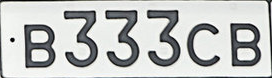

In [38]:
im3

In [39]:
im4 = np.array(im3)
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2GRAY)


In [40]:


im5 = cv2.Canny(im4,30,200)
cv2.imshow('Canny edges', im5)
if cv2.waitKey():
    cv2.destroyAllWindows()
    
_, contours, hierarchy = cv2.findContours( im5, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [41]:
#_, contours, hierarchy = cv2.findContours( edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


In [42]:
max1 = cv2.contourArea(contours[0])
k = 0
max2 = 0
for i in contours:
    
    if cv2.contourArea(i) > max1:
        max1 = cv2.contourArea(i)
        max2 = k
    k += 1
print(max2)

3


In [43]:
k=0
p0 = []
for i in contours:
    #print(cv2.contourArea(i))
    if cv2.contourArea(i)>50:
        print (cv2.contourArea(i))
        p0.append(k)
    k+=1
    

20451.5


In [44]:
p0

[3]

In [45]:
k8=[]
for i in p0[:-1]:
    im2 = Image.open(frame_name)
    im3 = im2.crop((x1, y1, x2, y2))


    x02 = (max(contours[i][:,0,0]))
    x01 = (min(contours[i][:,0,0]))
    y02 = (max(contours[i][:,0,1]))
    y01 = (min(contours[i][:,0,1]))
    
    
    im002 = im3.crop((x01-5, y01-5, x02+5, y02+5))
    im002 = im002.convert('LA')
    k8.append(im002)
    im004 = np.array(im002)
    img2 = cv2.resize(im004, (40,55))
    
    im01=np.array(img2)[:,:,0]
    #print(im01.shape)
    im0 = cv2.resize(im01, (40,55))
    #print(im0.shape)
    im0 = im0.reshape(1, 55, 40, 1)/255.0
    print(model.predict_classes(im0))
    #otvet.append

[3]